<a href="https://colab.research.google.com/github/cboyda/MachineLearning/blob/main/Capstone_Team1_W23_original_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Capstone


Team member names:

*  Brett Adams
*  Cailenys Leslie
*  Clinton Boyda 
*  Tanvir Hossain
*  Ram Dershan

Dataset: 
[New York City Airbnb Open Data](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data)

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from  sklearn import neighbors
import plotly.graph_objects as go
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore") # disable warnings when making remote calls

# **Load Dataset**

In [ ]:
# Connect to Dataset

#original filename = "https://raw.githubusercontent.com/cboyda/MachineLearning/main/AB_NYC_2019.csv"
#df = pd.read_csv(filename)

# load both data sets in
original = "https://raw.githubusercontent.com/cboyda/MachineLearning/main/AB_NYC_2019.csv"
df_original = pd.read_csv(original)
additional = "https://raw.githubusercontent.com/cboyda/MachineLearning/main/full_nyc_dataset_cleaned_table-1.csv"
#df_additional = pd.read_csv(additional)

In [ ]:
# Merge the two datasets with an inner join, validate that no duplicate id values exist for a one to one join

#Choice 1: original dataset
df = df_original
# OR
#df = pd.merge(df_original, df_additional, how = "inner", on = "id", validate="one_to_one", suffixes=("_original","_additional"))

df.shape

(48895, 16)

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

# **Consider Required Features**

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# how many of each unique value exists in our cleaned data?
for col in df:
  print("\nFor column", col)
  print(df[col].value_counts(sort=True))


For column id
2539        1
25583366    1
25551687    1
25552076    1
25554120    1
           ..
13121809    1
13122135    1
13122318    1
13122932    1
36487245    1
Name: id, Length: 48895, dtype: int64

For column name
Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47905, dtype: int64

For column host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
    

In [ ]:
#define clean as duplicate
df_clean = df.copy()

In [ ]:
# drop all columns not necessary
# over simplifying for our first iteration

df_clean.drop(['id','name','host_name','number_of_reviews','last_review','reviews_per_month',
         'calculated_host_listings_count','id','host_id','latitude','longitude'], axis=1, inplace = True)

#merged data need to drop 'index' as well

# **Data Verification**

In [ ]:
df_clean.duplicated().any()

True

In [ ]:
# any duplicates in the data?
duplicate_rows = df_clean.duplicated()
df_no_dups = df_clean[~duplicate_rows]
print ("There are " + str(duplicate_rows.sum()) + " duplicate rows in our dataframe that need to be considered.")

There are 6930 duplicate rows in our dataframe that need to be considered.


In [ ]:
# really only needed if duplicate_rows > 0
df_clean = df_no_dups
#df_clean.reset_index(inplace=True)

In [ ]:
# check for null values
df_clean.isnull().sum()

neighbourhood_group    0
neighbourhood          0
room_type              0
price                  0
minimum_nights         0
availability_365       0
dtype: int64

# **Manage Zero Values**

In [ ]:
df_clean.head(10)

neighbourhood_group       neighbourhood        room_type  price  \
0            Brooklyn          Kensington     Private room    149   
1           Manhattan             Midtown  Entire home/apt    225   
2           Manhattan              Harlem     Private room    150   
3            Brooklyn        Clinton Hill  Entire home/apt     89   
4           Manhattan         East Harlem  Entire home/apt     80   
5           Manhattan         Murray Hill  Entire home/apt    200   
6            Brooklyn  Bedford-Stuyvesant     Private room     60   
7           Manhattan      Hell's Kitchen     Private room     79   
8           Manhattan     Upper West Side     Private room     79   
9           Manhattan           Chinatown  Entire home/apt    150   

   minimum_nights  availability_365  
0               1               365  
1               1               355  
2               3               365  
3               1               194  
4              10                 0  
5               3               129  
6              45                 0  
7               2               220  
8               2                 0  
9               1               188

In [ ]:
df_clean.shape

(41965, 6)

Manage data with rental price = zero.

In [ ]:
# log of zero fails so we count how many have zero, if small, then drop
df_clean.loc[df_clean.price  == 0, 'price'].count()

11

In [ ]:
zero_price = df_clean.loc[df_clean.price  == 0, 'price'].index

In [ ]:
# zero price rows is low, dropping
df_clean.drop(zero_price,axis=0,inplace=True)

In [ ]:
df_clean.shape

(41954, 6)

Consider managing data where minimum nights = zero.

In [ ]:
# log of zero fails so we count how many have zero, if small, then drop
count_zero_min_nights = df_clean.loc[df_clean.minimum_nights  == 0, 'minimum_nights'].count()
count_zero_min_nights

0

In [ ]:
# set index for easier data management
zero_minimum_nights = df_clean.loc[df_clean.minimum_nights  == 0, 'minimum_nights'].index

In [ ]:
# zero price rows is low, dropping
if count_zero_min_nights > 0:
  df_clean.drop(zero_minimum_nights,axis=0,inplace=True)

# **Data Cleaning**


In [ ]:
df_clean.shape

(41954, 6)

In [ ]:
zero_availability = df_clean.loc[df_clean.availability_365 == 0, 'availability_365'].index
# zero availability means unit is NOT available so best drop from out model
df_clean.drop(zero_availability,axis=0,inplace=True)

DROP units that are simply not able to be rented. This includes availability = 0

In [ ]:
df_clean.shape

(30588, 6)

In [ ]:
# dropping availability_365 feature at this stage since it was a filter not a feature
df_clean.drop(['availability_365'], axis=1, inplace = True)

In [ ]:
numeric_data = df_clean.select_dtypes(include=['int64', 'float64'])
categorical_data = df_clean.select_dtypes(exclude=[np.number])

In [ ]:
numeric_data

price  minimum_nights
0        149               1
1        225               1
2        150               3
3         89               1
5        200               3
...      ...             ...
48890     70               2
48891     40               4
48892    115              10
48893     55               1
48894     90               7

[30588 rows x 2 columns]

In [ ]:
categorical_data

neighbourhood_group       neighbourhood        room_type
0                Brooklyn          Kensington     Private room
1               Manhattan             Midtown  Entire home/apt
2               Manhattan              Harlem     Private room
3                Brooklyn        Clinton Hill  Entire home/apt
5               Manhattan         Murray Hill  Entire home/apt
...                   ...                 ...              ...
48890            Brooklyn  Bedford-Stuyvesant     Private room
48891            Brooklyn            Bushwick     Private room
48892           Manhattan              Harlem  Entire home/apt
48893           Manhattan      Hell's Kitchen      Shared room
48894           Manhattan      Hell's Kitchen     Private room

[30588 rows x 3 columns]

In [ ]:
# what are the unique values for each column?
# label can be category but others should be binary for simplicity
for col in df_clean:
    print(col, df_clean[col].unique(), df_clean[col].nunique() )

neighbourhood_group ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx'] 5
neighbourhood ['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'Murray Hill'
 "Hell's Kitchen" 'Chinatown' 'Upper West Side' 'South Slope'
 'Williamsburg' 'Fort Greene' 'Chelsea' 'Crown Heights' 'East Harlem'
 'Park Slope' 'Bedford-Stuyvesant' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'West Village' 'Gowanus' 'Flatlands'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Ridgewood' 'Morningside Heights' 'Jamaica' 'Middle Village' 'NoHo'
 'Ditmars Steinway' 'Cobble Hill' 'Flatiron District' 'Roosevelt Island'
 'Greenwich Village' 'East Flatbush' 'Tompkinsville' 'Astoria'
 'Clason Point' 'Eastchester' 'Little Italy' 'Kingsbridge' 'Two Bridges'
 'Queens Village' 'R

In [ ]:
# how many of each unique value exists in our cleaned data?
for col in df_clean:
  print("\nFor column", col)
  print(df_clean[col].value_counts(sort=True))



For column neighbourhood_group
Manhattan        13136
Brooklyn         11992
Queens            4230
Bronx              903
Staten Island      327
Name: neighbourhood_group, dtype: int64

For column neighbourhood
Bedford-Stuyvesant    2396
Williamsburg          2008
Harlem                1691
Bushwick              1403
Hell's Kitchen        1363
                      ... 
Rossville                1
Fort Wadsworth           1
Willowbrook              1
Silver Lake              1
Richmondtown             1
Name: neighbourhood, Length: 218, dtype: int64

For column room_type
Entire home/apt    16205
Private room       13584
Shared room          799
Name: room_type, dtype: int64

For column price
150     1142
100     1129
60       819
50       803
200      785
        ... 
1731       1
587        1
689        1
3750       1
421        1
Name: price, Length: 644, dtype: int64

For column minimum_nights
2      7605
1      7504
3      4957
30     3190
4      1940
       ... 
74        1
480  

In [ ]:
df_clean.dtypes

neighbourhood_group    object
neighbourhood          object
room_type              object
price                   int64
minimum_nights          int64
dtype: object

# **Manage Extreme Values**

In [ ]:
# BEFORE extreme values have been handled, view the ranges graphically
for column in df_clean.columns:
  fig = px.histogram(df_clean, x=column, marginal="box")
  fig.show()

Consider how to manage extreme values.

In [ ]:
extreme_values = []
for column in numeric_data.columns:
  # Select the first quantile
  q1 = df[column].quantile(0.25)

  # Select the third quantile
  q3 = df[column].quantile(0.75)

  max = df[column].quantile(1)

  # Create a mask inbetween q1 & q3
  IQR = q3 - q1

  # Filtering the initial dataframe with a mask
  #filtered = df.query('(@q1 - 1.5 * @IQR) <= [column] <= (@q3 + 1.5 * @IQR)')
  # Filtering Values between Q1-1.5IQR and Q3+1.5IQR  

  #maximum outliers
  bottom_fence = 0 if (q1 - 1.5 * IQR) < 0 else q1 - 1.5 * IQR
  upper_fence = max if (q3 + 1.5 * IQR) > max else (q3 + 1.5 * IQR)
  #display(column, bottom_fence, upper_fence)
  extreme_values.append([column, bottom_fence, upper_fence])


In [ ]:
  extreme_values

[['price', 0, 334.0], ['minimum_nights', 0, 11.0]]

In [ ]:
# lookup in extreme_values UPPER/LOWER FENCE values
def get_upperfence(name=''):
  for i in range(len(extreme_values)):
    if extreme_values[i][0] == name:
      return extreme_values[i][2]
    else:
      continue

def get_lowerfence(name=''):
  for i in range(len(extreme_values)):
    if extreme_values[i][0] == name:
      return extreme_values[i][1]
    else:
      continue

In [ ]:
# calculate percentage of values over our extreme, if under 5% consider dropping
display ('Pricing percentage over extreme:')
(df_clean.loc[df_clean.price > get_upperfence('price'), 'price'].count() / df_clean.price.count()) * 100 

'Pricing percentage over extreme:'

7.238132601020007

In [ ]:
# drop upperfence extreme prices
df_clean.drop(df_clean[df_clean['price'] > get_upperfence('price')].index, inplace = True)


In [ ]:
# calculate percentage of values over our extreme, if under 5% consider dropping
#display ('Minimum nights percentage over extreme:')
#(df_clean.loc[df_clean.minimum_nights > get_upperfence('minimum_nights'), 'minimum_nights'].count() / df_clean.minimum_nights.count()) * 100 

In [ ]:
# NOT DROPPING minimum_nights because of high percentage
# drop upperfence extreme minimum nights
# df_clean.drop(df_clean[df_clean['minimum_nights'] > get_upperfence('minimum_nights')].index, inplace = True)

In [ ]:
# AFTER extreme values dropped, how do histograms look now?
for column in df_clean.columns:
  fig = px.histogram(df_clean, x=column, marginal="box")
  fig.show()

# **Transformation of Data**

Price from graph needs correction, utilizing log of price to get a gaussian curve.

In [ ]:
# view current price histogram
fig = px.histogram(df_clean, x=["price"], marginal="box")
fig.show()

In [ ]:
# create feature transform price with log function
df_clean['log_price'] = np.log(df_clean['price'])

In [ ]:
# view log_price histogram
fig = px.histogram(df_clean, x=["log_price"], marginal="box")
fig.show()

In [ ]:
df_clean.dtypes

neighbourhood_group     object
neighbourhood           object
room_type               object
price                    int64
minimum_nights           int64
log_price              float64
dtype: object

# **Drop Cleaned but Unnecessary Columns/Features**

In [ ]:
# dropping price as preference to keep ONLY log_price
df_clean.drop('price', axis= 1, inplace=True)

In [ ]:
# after FILTERING rows with zero minimum nights, we don't need minimium nights any longer, just drop that entire feature
df_clean.drop(['minimum_nights'], axis=1, inplace = True)

# **Declaration, Normalization and Scaling of Data**

In [ ]:
df_clean.head(5)

neighbourhood_group neighbourhood        room_type  log_price
0            Brooklyn    Kensington     Private room   5.003946
1           Manhattan       Midtown  Entire home/apt   5.416100
2           Manhattan        Harlem     Private room   5.010635
3            Brooklyn  Clinton Hill  Entire home/apt   4.488636
5           Manhattan   Murray Hill  Entire home/apt   5.298317

In [ ]:
column_names= df_clean.columns
features = column_names[column_names != 'log_price']
label = column_names[-1]
display(features, label)


Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')

'log_price'

In [ ]:
Example_Count = len(df_clean)
Feature_Count = len(df_clean.columns) - 1

print("Number of Examples:", Example_Count)
print("Number Features:", Feature_Count)

Number of Examples: 28374
Number Features: 3


In [ ]:
numerical_features = np.array(df_clean.select_dtypes(include=['int64','float64','uint8']).columns)

non_numerical_features = np.array([column for column in df_clean.columns \
                                   if column not in numerical_features and \
                                      column != label])

In [ ]:
# need to ensure your LABEL is not a column listed in the FEATURES else columntransformer fails
#numerical_features = numerical_features[:-1]
numerical_features = numerical_features[numerical_features != 'log_price']
numerical_features

array([], dtype=object)

In [ ]:
# could have been called categorical_features
non_numerical_features # no longer any categorical features

array(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='<U19')

# Numerical Analysis

Now that we have ALL numeric features we can analyze them using correlation etc...

<Axes: title={'center': 'Correlation with Independent Variable'}>

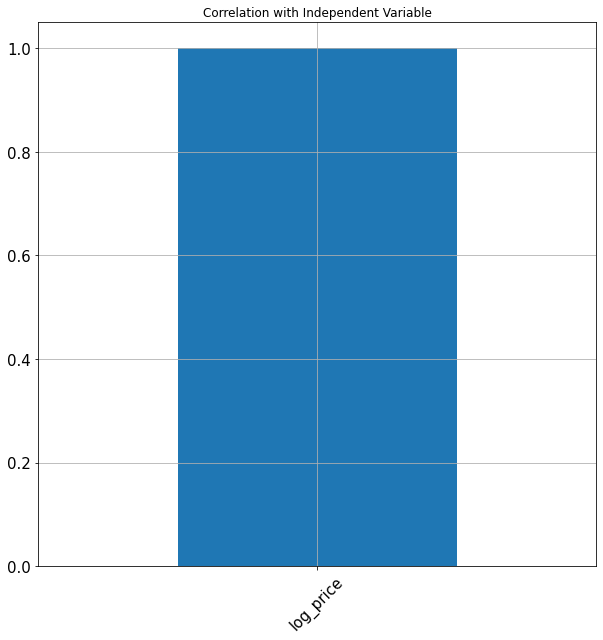

In [ ]:
# Correlation with independent Variable (Note: Models like RF are not linear like these)
df_clean.corrwith(df_clean[label]).plot.bar(
        figsize = (10, 10), title = "Correlation with Independent Variable", fontsize = 15,
        rot = 45, grid = True)

In [ ]:
#Show all correlation values
df_corr = df_clean.corr().round(1)  
# Mask to matrix
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Viz
df_corr_viz = df_corr.mask(mask).dropna(how='all').dropna(how='all')
# colour variable https://plotly.com/python/colorscales/
fig = px.imshow(df_corr_viz, text_auto=True, color_continuous_scale=[(0.00, "black"),   (0.33, "black"),
                                                     (0.33, "white"), (0.66, "white"),
                                                     (0.66, "blue"),  (1.00, "blue")])
fig.show()

In [ ]:
df_clean.describe()

log_price
count  28374.000000
mean       4.650478
std        0.585701
min        2.302585
25%        4.219508
50%        4.605170
75%        5.105945
max        5.811141

# **Pre-processing for ML Models**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder

# numeric_features = accomodates/bedrooms/bathrooms
numeric_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())]
)

# categorical_features = neighbourhood_group/room_type/property_type
categorical_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder())])


preprocessor = ColumnTransformer(
    transformers=[
        ("numeric features", numeric_transformer, numerical_features)
        ,("categorical features", categorical_transformer, non_numerical_features)
    ],
    n_jobs=-1
)

In [ ]:
#Define X and y
#X = df_clean.loc[:,california['feature_names']]
#y = df_clean.loc[:,'MEDV']

#X = df[numerical_features+non_numerical_features]
#y = df['target']
X = df_clean[features]
y = df_clean[label]
display ("Types of X and y need to be DF and Series", type(X),type(y))

'Types of X and y need to be DF and Series'

pandas.core.frame.DataFrame

pandas.core.series.Series

In [ ]:
#Splitting the Dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((22699, 3), (5675, 3), (22699,), (5675,))

In [275]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#define results dataframe to store results
results = pd.DataFrame([],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

regressors = [
    KNeighborsRegressor(weights='uniform')
   ,KNeighborsRegressor(weights='distance')
   ,DecisionTreeRegressor(random_state=0)
   ,RandomForestRegressor(random_state=0)
   ,SVR()
   ,AdaBoostRegressor()
   ,GradientBoostingRegressor()
   ]
for regressor in regressors:
    pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',regressor)
           ])
    model = pipeline.fit(X_train, y_train)
    
    model_name = regressor
    # Predicting/Measuring Test Set
    y_pred = model.predict(X_test)
    from sklearn import metrics
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2 = metrics.r2_score(y_test, y_pred)
    model_results = pd.DataFrame([[model_name, mae, mse, rmse, r2]],
    #model_results = pd.DataFrame([[model_name, '{:.3}%'.format(mae*100), '{:.3}%'.format(mse*100), '{:.3}%'.format(rmse*100), '{:.3}%'.format(r2*100)]],
                  columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])
    results = results.append(model_results, ignore_index = True)

#The best model
display ("Original dataset results:")
display (results.sort_values(by='R2 Score', ascending=False))

'Original dataset results:'

Model       MAE       MSE  \
3  (DecisionTreeRegressor(max_features=1.0, rando...  0.290434  0.139567   
4                                              SVR()  0.289325  0.139810   
2              DecisionTreeRegressor(random_state=0)  0.291166  0.141173   
6  ([DecisionTreeRegressor(criterion='friedman_ms...  0.296018  0.142181   
0                              KNeighborsRegressor()  0.313779  0.161126   
1            KNeighborsRegressor(weights='distance')  0.314487  0.162956   
5  (DecisionTreeRegressor(max_depth=3, random_sta...  0.322794  0.163546   

       RMSE  R2 Score  
3  0.373587  0.588656  
4  0.373912  0.587940  
2  0.375729  0.583924  
6  0.377068  0.580953  
0  0.401405  0.525115  
1  0.403678  0.519722  
5  0.404408  0.517984